In [151]:
import os
import pandas as pd
import numpy as np
from datetime import datetime
cwd = os.getcwd()
print("Current working directory: {0}".format(cwd))

from os import listdir
from os.path import isfile, join 
path = "./data/data_IRS"
files = pd.Series([(path + "/" + f) for f in listdir(path) if isfile(join(path, f))])
files = files[files.str.endswith(".csv")]
files

Current working directory: /Users/chereowang27/NYCDSA/Capstone/NYCDSA_Capstone/Cherie


0    ./data/data_IRS/17zpallagi.csv
2    ./data/data_IRS/12zpallagi.csv
3    ./data/data_IRS/18zpallagi.csv
4    ./data/data_IRS/11zpallagi.csv
5    ./data/data_IRS/14zpallagi.csv
6    ./data/data_IRS/13zpallagi.csv
7    ./data/data_IRS/16zpallagi.csv
9    ./data/data_IRS/15zpallagi.csv
dtype: object

In [164]:
import re
fi = []
for f in files:
    print(f)
    df = pd.read_csv(f, index_col = None, header = 0)
    df["yr"] = "20" + re.split("/", f)[3][:2]
    print(df.shape)
    fi.append(df)

./data/data_IRS/17zpallagi.csv
(166537, 154)
./data/data_IRS/12zpallagi.csv
(166904, 78)
./data/data_IRS/18zpallagi.csv
(165935, 154)
./data/data_IRS/11zpallagi.csv
(167334, 74)
./data/data_IRS/14zpallagi.csv
(166722, 128)
./data/data_IRS/13zpallagi.csv
(166740, 115)
./data/data_IRS/16zpallagi.csv
(179796, 148)
./data/data_IRS/15zpallagi.csv
(166698, 132)


In [163]:
soi0= pd.concat(fi, join="outer", axis = 0)
# convert year variable to datetime format
soi0['yr'] = [datetime.strptime(x, "%Y").year for x in soi0['yr']]

0         2017
1         2017
2         2017
3         2017
4         2017
          ... 
166693    2015
166694    2015
166695    2015
166696    2015
166697    2015
Name: yr, Length: 1346666, dtype: int64

In [10]:
var = pd.read_excel("./data/data_IRS/doc_11.xlsx")
var_list = list(var["Description"])
del var_list[4:10]
var_list

['The State Federal Information Processing System (FIPS) code',
 'The state associated with the ZIP code',
 '5-digit Zip code',
 'Size of adjusted gross income',
 'Number of returns [3]',
 'Number of joint returns',
 "Number of returns with paid preparer's signature",
 'Number of exemptions',
 'Number of dependents',
 'Adjust gross income (AGI)',
 'Number of returns with salaries and wages',
 'Salaries and wages amount',
 'Number of returns with taxable interest',
 'Taxable interest amount',
 'Number of returns with ordinary dividends ',
 'Ordinary dividends amount',
 'Number of returns with qualified dividends',
 'Qualified dividends amount [4]',
 'Number of returns with business or professional net income (less loss)',
 'Business or professional net income (less loss) amount',
 'Number of farm returns',
 'Number of returns with net capital gain (less loss)',
 'Net capital gain (less loss) amount',
 'Number of returns with taxable individual retirement arrangements distributions',
 'T

In [51]:
soi_2011 = pd.read_csv(files[4], index_col = None, header = 0, names = list(var_list))
soi_2011.head(50)
soiCAzips = soi_2011[soi_2011["The state associated with the ZIP code"]=="CA"]["5-digit Zip code"]

In [5]:
var = var[["Variable Name","Description", "Value/Line Reference","Type"]]
                    #names = ["Var_name", "Description", "Value", "unnamed", "Type"])
var

,Variable Name,Description,Value/Line Reference,Type
0,STATEFIPS,The State Federal Information Processing Syste...,01–56,NaN
1,STATE,The state associated with the ZIP code,Two-digit state abbreviation code,NaN
2,ZIPCODE,5-digit Zip code,NaN,NaN
3,AGI_STUB,Size of adjusted gross income,0 = No AGI Stub,NaN
4,AGI_STUB,Size of adjusted gross income,"1 = '$1 under $25,000'",NaN
...,...,...,...,...
74,A10300,Total tax liability amount [9],1040:61 / 1040A:35 / 1040EZ: 10,NaN
75,N11901,Number of returns with tax due at time of filing,1040:76 / 1040A:45 / 1040EZ:12,NaN
76,A11901,Tax due at time of filing amount [10],1040:76 / 1040A:45 / 1040EZ:12,NaN
77,N11902,Number of returns with overpayments refunded,1040:73 / 1040A:42 / 1040EZ:11a,NaN


In [20]:
# varD = pd.Series(var["Description"])
# varD.str.startswith("Number of")
# #varD[varD.str.startswith("Number of")].index.to_list
# #files = files[files.str.endswith(".csv")]

# numCol = var[var["Description"].apply(lambda x: x.startswith("Number"))]["Variable Name"]
# #soi1.head(10)


# soi1 = pd.concat([soi_2011[["ZIPCODE","AGI_STUB"]],soi_2011[numCol]],axis = 1)
# ss = soi1.groupby("ZIPCODE").agg("sum")
# soi2 = soi_2011[list(set(var["Variable Name"])-set(numCol))]
# soi2.columns

Index(['STATE', 'A01000', 'AGI_STUB', 'A00100', 'A00900', 'A06500', 'A01700',
       'STATEFIPS', 'A07220', 'A18300', 'ZIPCODE', 'A07180', 'A59720',
       'A04470', 'A00200', 'A11070', 'A03300', 'A04800', 'A18450', 'A01400',
       'A00300', 'A10300', 'A09600', 'A19700', 'A02300', 'A02500', 'A11901',
       'A59660', 'A07100', 'A00600', 'A18500', 'A07260', 'A00650', 'A19300',
       'A18425', 'A11902'],
      dtype='object')

In [16]:
# Read in acs data, merge median_income with tax data in soi_2011, filter and keep 
# the taxable agi_stub range where the median_income falls in. 
# acs = pd.read_csv("./data/demo_zip_11.csv", index_col = 0)
# income_m = acs[["geo_id","median_income"]]
# income_m = income_m.rename(columns = {'geo_id':'ZIPCODE'})
# income_m.columns
# soi1 = pd.merge(soi_2011, income_m, left_on ="5-digit Zip code" ,
#                                     right_on = "ZIPCODE",
#                                        how = "left") 
# soi1.shape

(167334, 75)

In [183]:
# grab the agi bracket of the median_income using min and max of the bracket 
# agiMin = {1: 1, 2:25000, 3:50000, 4: 75000, 5: 100000, 6: 200000}
# agiMax = {1: 25000, 2: 50000, 3: 75000, 4: 100000, 5:200000, 6: None }

# soi3["agiMin"] = soi3["AGI_STUB"].map(agiMin)
# soi3["agiMax"] = soi3["AGI_STUB"].map(agiMax)

# def labelM(row): 
#     if row['median_income'] < 200000: 
#         if row["agiMin"] < row['median_income'] < row['agiMax']:
#             return row['AGI_STUB']
#     elif row['median_income'] > 200000: 
#         return 6
#     else: return None
    
# soi3["agiM"] = soi3.apply(lambda row: labelM(row), axis = 1)
# soi_2011_m = soi3.loc[soi3["AGI_STUB"]==soi3["agiM"]]


In [184]:
# soiCol = list(set(soi_2011_m.columns))

In [45]:
# read in all_metros_11 and merge with IRS data

In [61]:
acs11_ca = pd.read_csv("./data/cali_metros_11.csv", index_col = None)
acs11_ca = acs11_ca[["RegionName","Metro", "CountyName", "City","avg_rent"]]
acs11_ca.shape
soi11_ca = soi_2011[soi_2011["The state associated with the ZIP code"] == "CA"]
soi1 = pd.merge(acs11_ca, soi11_ca, 
                             left_on = "RegionName", 
                             right_on = "5-digit Zip code", 
                             how = "inner"
        )
soi1 = soi1.drop(["The State Federal Information Processing System (FIPS) code"],axis = 1)

In [73]:
acs11_ca.shape

(1159, 260)

In [72]:
soi1.head(10)

,RegionName,Metro,CountyName,City,avg_rent,The state associated with the ZIP code,5-digit Zip code,Size of adjusted gross income,Number of returns [3],Number of joint returns,...,Number of returns with alternative minimum tax,Alternative minimum tax amount,Number of returns with income tax,Income tax amount [8],Number of returns with tax liability,Total tax liability amount [9],Number of returns with tax due at time of filing,Tax due at time of filing amount [10],Number of returns with overpayments refunded,Overpayments refunded amount [11]
0,94109,San Francisco-Oakland-Hayward,San Francisco County,San Francisco,3135.416667,CA,94109,1,8708.0,1028.0,...,29.0000,41.0000,3841.0,2962.0,4782.0,4813.0,1453.0,1316.0,6239.0,8537.0
1,94109,San Francisco-Oakland-Hayward,San Francisco County,San Francisco,3135.416667,CA,94109,2,7328.0,962.0,...,0.0001,0.0001,6655.0,21653.0,6711.0,23862.0,1514.0,2748.0,5568.0,9744.0
2,94109,San Francisco-Oakland-Hayward,San Francisco County,San Francisco,3135.416667,CA,94109,3,5349.0,576.0,...,0.0001,0.0001,5231.0,41007.0,5248.0,42857.0,1457.0,3442.0,3666.0,7685.0
3,94109,San Francisco-Oakland-Hayward,San Francisco County,San Francisco,3135.416667,CA,94109,4,3359.0,476.0,...,22.0000,33.0000,3315.0,42705.0,3324.0,44287.0,910.0,2698.0,2296.0,5636.0
4,94109,San Francisco-Oakland-Hayward,San Francisco County,San Francisco,3135.416667,CA,94109,5,4763.0,1183.0,...,523.0000,1387.0000,4733.0,110689.0,4737.0,114141.0,1294.0,7028.0,3152.0,11784.0
5,94109,San Francisco-Oakland-Hayward,San Francisco County,San Francisco,3135.416667,CA,94109,6,2393.0,1269.0,...,1970.0000,30871.0000,2380.0,286066.0,2384.0,293339.0,1181.0,32408.0,766.0,10409.0
6,90250,Los Angeles-Long Beach-Anaheim,Los Angeles County,Hawthorne,2317.666667,CA,90250,1,19682.0,2380.0,...,0.0000,0.0000,5426.0,3494.0,9243.0,8667.0,1884.0,1297.0,17126.0,45440.0
7,90250,Los Angeles-Long Beach-Anaheim,Los Angeles County,Hawthorne,2317.666667,CA,90250,2,12686.0,2933.0,...,0.0000,0.0000,8795.0,19455.0,9387.0,21525.0,1530.0,2292.0,11065.0,32312.0
8,90250,Los Angeles-Long Beach-Anaheim,Los Angeles County,Hawthorne,2317.666667,CA,90250,3,4886.0,1912.0,...,0.0001,0.0001,4527.0,21765.0,4595.0,22666.0,899.0,1949.0,3930.0,12443.0
9,90250,Los Angeles-Long Beach-Anaheim,Los Angeles County,Hawthorne,2317.666667,CA,90250,4,2264.0,1249.0,...,60.0000,70.0000,2234.0,17545.0,2240.0,18275.0,470.0,1433.0,1763.0,6644.0


In [100]:
soi1_p = pd.pivot_table(soi1, index = ["RegionName", "Metro", "CountyName", "City","The state associated with the ZIP code", "The state associated with the ZIP code", "5-digit Zip code"],
                       columns = ["Size of adjusted gross income"])

In [104]:
soi1_p = soi1_p.replace([0,.0001], 0)
soi1_p = soi1_p.drop( [(                            'avg_rent', 2),
            (                            'avg_rent', 3),
            (                            'avg_rent', 4),
            (                            'avg_rent', 5),
            (                            'avg_rent', 6)], axis = 1)

In [105]:
soi1_p.shape

(1116, 415)

In [121]:
# Standardize features
X = soi1_p.iloc[:,:414]
X = X - X.mean(axis = 0)
y = soi1_p.iloc[:,-1]

In [94]:
from sklearn.decomposition import PCA
pca.set_params(n_components = None)
pca = PCA()
pca.fit(X)
pca.components_

array([[-2.00012367e-03, -4.90226009e-04,  0.00000000e+00, ...,
         1.06557707e-04,  5.43820645e-04,  4.10123433e-04],
       [-2.99832518e-03, -1.19773374e-03,  3.33066907e-16, ...,
        -2.39294131e-03, -3.33859260e-03, -5.22857784e-04],
       [ 3.03991417e-02,  7.32946638e-03, -3.33066907e-16, ...,
         9.47500102e-04, -1.19070189e-03, -7.17319151e-04],
       ...,
       [-0.00000000e+00,  3.15875527e-16, -1.24400724e-04, ...,
        -1.49831658e-17, -1.67289007e-17, -2.31436665e-17],
       [-0.00000000e+00, -1.35574399e-16,  1.39107758e-04, ...,
         6.67589017e-18, -4.49859198e-18, -9.16674772e-18],
       [ 0.00000000e+00, -3.63476610e-14, -8.29935816e-01, ...,
         6.99700714e-14,  2.33424391e-14,  2.29924641e-13]])

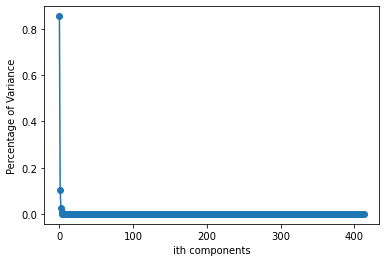

In [124]:
import matplotlib.pyplot as plt
plt.plot(range(414), pca.explained_variance_ratio_)
plt.scatter(range(414), pca.explained_variance_ratio_)
plt.xlabel("ith components")
plt.ylabel("Percentage of Variance")
plt.show()

In [127]:
pca.set_params(n_components=2).fit(X)
X2 = pca.transform(X)

In [128]:
pca.explained_variance_ratio_

array([0.85398202, 0.10689941])

In [139]:
pca.set_params(n_components=3).fit(X)
X2 = pca.transform(X)
pca.explained_variance_ratio_
pca.components_

array([[-1.93691520e-03, -4.73697556e-04,  2.32558086e-33, ...,
         1.16823417e-04,  5.55457561e-04,  4.10849079e-04],
       [-3.36538790e-03, -1.28342458e-03, -4.74198635e-26, ...,
        -2.40083951e-03, -3.32730973e-03, -5.14265528e-04],
       [ 3.04387511e-02,  7.32918459e-03,  1.15416508e-21, ...,
         9.19935368e-04, -1.22118526e-03, -7.23317580e-04]])

In [141]:
features = list(X.columns)
loadings = pca.components_.T*np.sqrt(pca.explained_variance_)

In [142]:
loadings

array([[-1.53170168e+03, -9.41590366e+02,  4.16493995e+03],
       [-3.74597372e+02, -3.59084973e+02,  1.00285368e+03],
       [ 1.83905631e-27, -1.32674414e-20,  1.57924622e-16],
       ...,
       [ 9.23833035e+01, -6.71722674e+02,  1.25874927e+02],
       [ 4.39252726e+02, -9.30936606e+02, -1.67095006e+02],
       [ 3.24897149e+02, -1.43884593e+02, -9.89716784e+01]])

In [143]:
features

[('Additional child tax credit amount', 1),
 ('Additional child tax credit amount', 2),
 ('Additional child tax credit amount', 3),
 ('Additional child tax credit amount', 4),
 ('Additional child tax credit amount', 5),
 ('Additional child tax credit amount', 6),
 ('Adjust gross income (AGI)', 1),
 ('Adjust gross income (AGI)', 2),
 ('Adjust gross income (AGI)', 3),
 ('Adjust gross income (AGI)', 4),
 ('Adjust gross income (AGI)', 5),
 ('Adjust gross income (AGI)', 6),
 ('Alternative minimum tax amount', 1),
 ('Alternative minimum tax amount', 2),
 ('Alternative minimum tax amount', 3),
 ('Alternative minimum tax amount', 4),
 ('Alternative minimum tax amount', 5),
 ('Alternative minimum tax amount', 6),
 ('Business or professional net income (less loss) amount', 1),
 ('Business or professional net income (less loss) amount', 2),
 ('Business or professional net income (less loss) amount', 3),
 ('Business or professional net income (less loss) amount', 4),
 ('Business or professional ne

In [140]:
import plotly.express as px

fig = px.scatter(X2, x=0, y=1)
for i, feature in enumerate(features):
    fig.add_shape(
        type='line',
        x0=0, y0=0,
        x1=loadings[i, 0],
        y1=loadings[i, 1]
    )
    fig.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
    )
fig.show()

ValueError: 
    Invalid value of type 'builtins.tuple' received for the 'text' property of layout.annotation
        Received value: ('Additional child tax credit amount', 1)

    The 'text' property is a string and must be specified as:
      - A string
      - A number that will be converted to a string